# TFIDF

## importing libraries and loading dataset from the file path

In [102]:
import pandas as pd

file= "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head(10)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## Get the stop words

In [103]:

import nltk
import pandas as pd

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

file_path = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"

df = pd.read_csv(file_path)

print(df.head())  

{'won', 's', 'now', 'for', 'as', 'only', "haven't", 'but', 'those', 'then', 'has', 'your', 'should', 'will', "mustn't", "aren't", 'and', "needn't", 'into', 'me', "you're", 'no', "you'll", 'when', 'itself', 'couldn', 'does', 'a', "wouldn't", 'whom', 'nor', 'up', 'didn', 'isn', 'themselves', 'is', 'ma', 'all', "should've", 'while', 'yours', 'at', 'very', 'what', 'which', 'in', 'm', "won't", "don't", 'other', "weren't", 'wouldn', 'here', 'they', 'just', "isn't", "shouldn't", 'any', 'ain', 'how', 'under', 'my', 'had', 'i', 'out', 'after', 'doesn', 'we', 've', 'from', 'than', 'them', 'hasn', 'below', 'hers', 'further', "didn't", 'it', 'was', 'mustn', 're', 'until', 'more', 'been', 'once', 'its', 'to', 'don', 'this', 'during', 'or', 'him', 'down', 'hadn', 'doing', 'she', 'an', "hasn't", 'who', 'shouldn', 'if', 'most', 'll', 'herself', 'theirs', 'yourselves', 'both', 'd', 'did', 'same', 'he', "you'd", 'o', 'why', 'haven', 'am', "mightn't", 'between', 'mightn', 'over', 'not', "wasn't", 'oursel

## Removing Stopwords

In [104]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

file = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"
dataframe = pd.read_csv(file)

text_column_name = 'text'

stop_words = set(stopwords.words('english'))
dataframe[text_column_name] = dataframe[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  
0         NaN  33: may first convey presi

## Pre - processing Pipeline

In [105]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

text_column_name = 'text'

dataframe = pd.read_csv("C:/Users/dharm/Downloads/un-general-debates-blueprint.csv")

stop_words = set(stopwords.words('english'))

dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## Running the Pipeline

In [106]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

text_column_name = 'text'

dataframe = pd.read_csv("C:/Users/dharm/Downloads/un-general-debates-blueprint.csv")

stop_words = set(stopwords.words('english'))
dataframe[text_column_name+'_tokens'] = dataframe[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

print(dataframe.head(10))

   session  year country                     country_name             speaker  \
0       25  1970     ALB                          Albania             Mr. NAS   
1       25  1970     ARG                        Argentina  Mr. DE PABLO PARDO   
2       25  1970     AUS                        Australia         Mr. McMAHON   
3       25  1970     AUT                          Austria  Mr. KIRCHSCHLAEGER   
4       25  1970     BEL                          Belgium          Mr. HARMEL   
5       25  1970     BLR                          Belarus      Mr. GURINOVICH   
6       25  1970     BOL  Bolivia, Plurinational State of  Mr. CAMACHO OMISTE   
7       25  1970     BRA                           Brazil  Mr. GIBSON BARBOZA   
8       25  1970     CAN                           Canada           Mr. SHARP   
9       25  1970     CMR                         Cameroon          Mr. AHIDJO   

     position                                               text  \
0         NaN  33: May I first convey to

## Counting tokens

In [107]:
from collections import Counter

counter = Counter()
dataframe['text_tokens'].map(counter.update)

freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)

print(freq_df.head(10))

                 freq
token                
nations        124508
united         120763
international  117223
world           89421
countries       85734
peace           72625
development     62632
states          59713
people          59338
security        58425


## word cloud

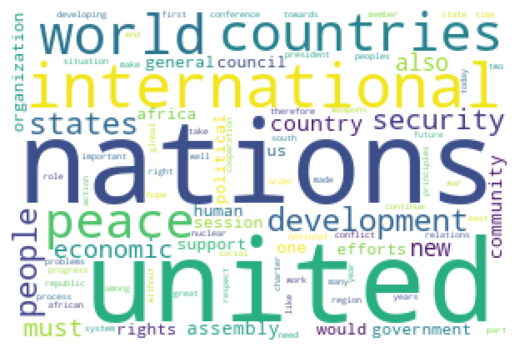

In [108]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=200, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


## TFIDF AND IDF COMPARE

In [109]:
import numpy as np
from collections import Counter

def compute_idf(df, column='text_tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    counter = Counter()
    df[column].map(update)  
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df']) + 0.1
    idf_df.index.name = 'token'
    return idf_df

idf_df = compute_idf(dataframe)
print(idf_df.head(20))

                 df       idf
token                        
insatiable       45  5.216929
organization   6820  0.195976
blow            288  3.360631
tactics         320  3.255270
supports       2997  1.018224
questionable     68  4.804083
oneself          78  4.666882
underhand         5  7.414153
inviolability   246  3.518260
precisely       909  2.211246
south          4593  0.591303
elimination    1999  1.423189
throwing         35  5.468243
states         7211  0.140228
lull             47  5.173444
instrument     1934  1.456246
arrogate         47  5.173444
order          6263  0.281177
partner         575  2.669221
activity       1251  1.891893


In [110]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

print(freq_df.head())

                 freq         tfidf
token                              
nations        124508  12649.986284
united         120763  12285.608632
international  117223  12364.276226
world           89421   9503.708982
countries       85734  10888.485986


## word cloud

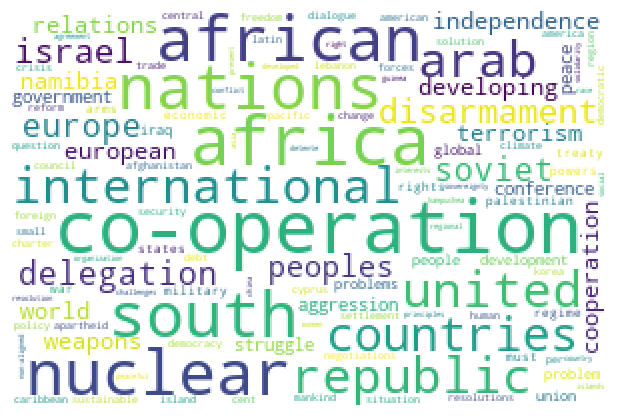

In [111]:
wc = WordCloud(background_color='white', width = 300, height=200, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()


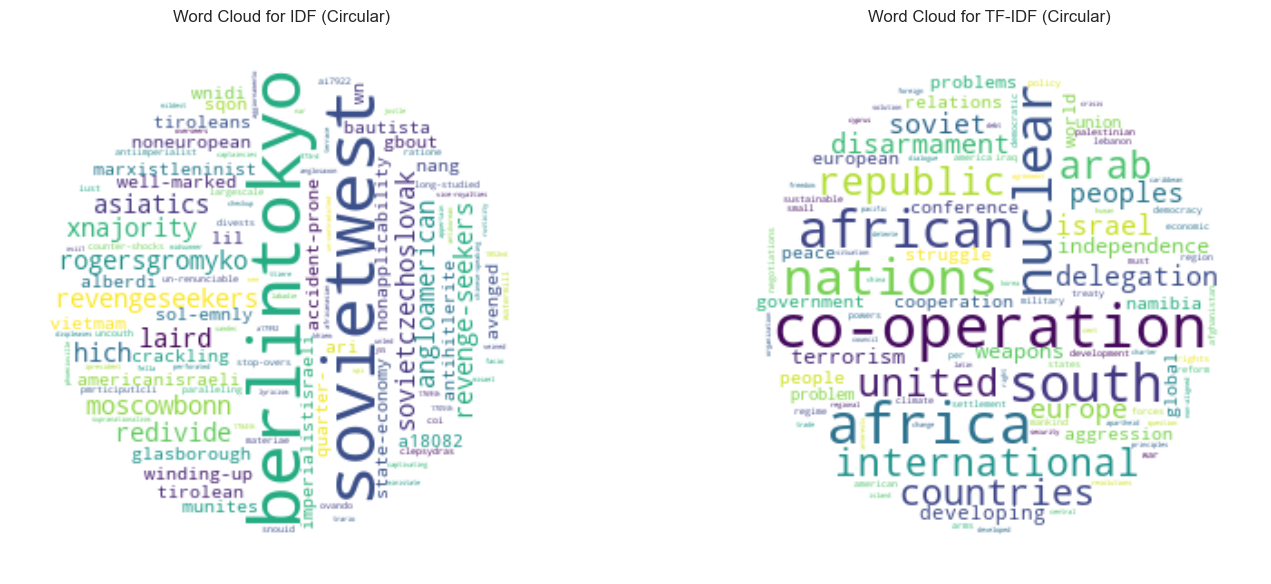

In [112]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud_idf = WordCloud(background_color='white', mask=mask).generate_from_frequencies(idf_df['idf'].to_dict())

wordcloud_tfidf = WordCloud(background_color='white', mask=mask).generate_from_frequencies(freq_df['tfidf'].to_dict())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf, interpolation='bilinear')
plt.title('Word Cloud for IDF (Circular)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (Circular)')
plt.axis('off')

plt.tight_layout()
plt.show()


# Let’s compare 1990 TF and 1990 TFIDF

In [125]:
import pandas as pd

file = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"

df = pd.read_csv(file)

df_1990 = df[df['year'] == 1990]

df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


## Dataframe for the year 1990 

In [114]:
df_1990 = df[df['year'] == 1990]

print(df_1990.head())

      session  year country          country_name   speaker position  \
1245       35  1980     AFG           Afghanistan      Dost      NaN   
1246       35  1980     AGO                Angola     Jorge      NaN   
1247       35  1980     ALB               Albania      Nase      NaN   
1248       35  1980     ARE  United Arab Emirates  Abdullah      NaN   
1249       35  1980     ARG             Argentina    Pastor      NaN   

                                                   text  
1245  ﻿ Mr. President, allow me, on behalf of the de...  
1246  ﻿282.\tI wish to begin by conveying to the Pre...  
1247  ﻿Mr. President, first of all, I should like, o...  
1248  ﻿Permit me at the outset, sir, to extend to yo...  
1249  ﻿Mr. President, I should like to begin my stat...  


## Stopwords for year 1990

In [115]:
import nltk
import pandas as pd

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

file_path = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"

df_1990 = pd.read_csv(file_path)

df_1990 = df[df['year'] == 1990]

print(df_1990.head())

{'won', 's', 'now', 'for', 'as', 'only', "haven't", 'but', 'those', 'then', 'has', 'your', 'should', 'will', "mustn't", "aren't", 'and', "needn't", 'into', 'me', "you're", 'no', "you'll", 'when', 'itself', 'couldn', 'does', 'a', "wouldn't", 'whom', 'nor', 'up', 'didn', 'isn', 'themselves', 'is', 'ma', 'all', "should've", 'while', 'yours', 'at', 'very', 'what', 'which', 'in', 'm', "won't", "don't", 'other', "weren't", 'wouldn', 'here', 'they', 'just', "isn't", "shouldn't", 'any', 'ain', 'how', 'under', 'my', 'had', 'i', 'out', 'after', 'doesn', 'we', 've', 'from', 'than', 'them', 'hasn', 'below', 'hers', 'further', "didn't", 'it', 'was', 'mustn', 're', 'until', 'more', 'been', 'once', 'its', 'to', 'don', 'this', 'during', 'or', 'him', 'down', 'hadn', 'doing', 'she', 'an', "hasn't", 'who', 'shouldn', 'if', 'most', 'll', 'herself', 'theirs', 'yourselves', 'both', 'd', 'did', 'same', 'he', "you'd", 'o', 'why', 'haven', 'am', "mightn't", 'between', 'mightn', 'over', 'not', "wasn't", 'oursel

## Removing Stopwords for the year 1990

In [116]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
file = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

df_1990 = df[df['year'] == 1990].copy()

text_column_name = 'text'

stop_words = set(stopwords.words('english'))
df_1990[text_column_name] = df_1990[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
    )

print(df_1990.head(10))

      session  year country          country_name     speaker position  \
1245       35  1980     AFG           Afghanistan        Dost      NaN   
1246       35  1980     AGO                Angola       Jorge      NaN   
1247       35  1980     ALB               Albania        Nase      NaN   
1248       35  1980     ARE  United Arab Emirates    Abdullah      NaN   
1249       35  1980     ARG             Argentina      Pastor      NaN   
1250       35  1980     AUS             Australia     Peacock      NaN   
1251       35  1980     AUT               Austria        Pahr      NaN   
1252       35  1980     BDI               Burundi  Nzambimana      NaN   
1253       35  1980     BEL               Belgium     Nothomb      NaN   
1254       35  1980     BEN                 Benin      Ogouma      NaN   

                                                   text  
1245  ﻿ mr. president, allow me, behalf delegation d...  
1246  ﻿282. wish begin conveying president, behalf p...  
1247  ﻿mr. 

## Pre-Processing pipeline for 1990

In [117]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens
text_column_name = 'text'

file = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

df_1990 = df[df['year'] == 1990].copy()

stop_words = set(stopwords.words('english'))

df_1990[text_column_name+'_tokens'] = df_1990[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

print(df_1990.head(20))

      session  year country                     country_name     speaker  \
1245       35  1980     AFG                      Afghanistan        Dost   
1246       35  1980     AGO                           Angola       Jorge   
1247       35  1980     ALB                          Albania        Nase   
1248       35  1980     ARE             United Arab Emirates    Abdullah   
1249       35  1980     ARG                        Argentina      Pastor   
1250       35  1980     AUS                        Australia     Peacock   
1251       35  1980     AUT                          Austria        Pahr   
1252       35  1980     BDI                          Burundi  Nzambimana   
1253       35  1980     BEL                          Belgium     Nothomb   
1254       35  1980     BEN                            Benin      Ogouma   
1255       35  1980     BFA                     Burkina Faso   Kargougou   
1256       35  1980     BGD                       Bangladesh         Huq   
1257       3

## Running pipeline for 1990

In [118]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
            return tokens

text_column_name = 'text'

file = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file)

df_1990 = df[df['year'] == 1990].copy()

stop_words = set(stopwords.words('english'))

df_1990[text_column_name+'_tokens'] = df_1990[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)
print(df_1990.head(20))

      session  year country                     country_name     speaker  \
1245       35  1980     AFG                      Afghanistan        Dost   
1246       35  1980     AGO                           Angola       Jorge   
1247       35  1980     ALB                          Albania        Nase   
1248       35  1980     ARE             United Arab Emirates    Abdullah   
1249       35  1980     ARG                        Argentina      Pastor   
1250       35  1980     AUS                        Australia     Peacock   
1251       35  1980     AUT                          Austria        Pahr   
1252       35  1980     BDI                          Burundi  Nzambimana   
1253       35  1980     BEL                          Belgium     Nothomb   
1254       35  1980     BEN                            Benin      Ogouma   
1255       35  1980     BFA                     Burkina Faso   Kargougou   
1256       35  1980     BGD                       Bangladesh         Huq   
1257       3

## Counting tokens for the year 1990

In [119]:
from collections import Counter

counter = Counter()
df_1990['text_tokens'].map(counter.update)

freq_df_1990 = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df_1990 = freq_df_1990.query('freq >= 1')
freq_df_1990.index.name = 'token'
freq_df_1990 = freq_df_1990.sort_values('freq', ascending=False)

print(freq_df_1990.head(20))

         freq
token        
       586073
e      385657
t      306433
i      247159
o      245725
n      243588
a      240924
s      188876
r      182209
h      138114
l      120794
c      105245
d      102080
u       80430
f       77986
m       71262
p       69482
g       52249
w       41608
y       41221


## TFIDF and IDF comparing for the year 1990

In [120]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re
from nltk.corpus import stopwords
import nltk

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

df_1990 = pd.read_csv("C:/Users/dharm/Downloads/un-general-debates-blueprint.csv")

stop_words = set(stopwords.words('english'))

df_1990['text_tokens'] = df_1990['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)

def compute_idf(df_1990, column='text_tokens', min_df_1990=1):
    def update(doc):
        counter.update(set(doc))
   
    counter = Counter()
    df_1990[column].map(update)
  
    idf_df_1990 = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df_1990 = idf_df_1990.query('df >= @min_df_1990')
    idf_df_1990['idf'] = np.log(len(df_1990)/idf_df_1990['df']) + 0.1
    idf_df_1990.index.name = 'token'
    return idf_df_1990

idf_df_1990 = compute_idf(df_1990)
print(idf_df_1990.head(10))

                 df       idf
token                        
insatiable       45  5.216929
organization   6820  0.195976
blow            288  3.360631
tactics         320  3.255270
supports       2997  1.018224
questionable     68  4.804083
oneself          78  4.666882
underhand         5  7.414153
inviolability   246  3.518260
precisely       909  2.211246


## TFIDF AND IDF comparing for the year 1990

In [121]:
freq_df_1990['tfidf'] = freq_df_1990['freq'] * idf_df_1990['idf']

print(freq_df_1990.head())

         freq         tfidf
token                      
       586073           NaN
e      385657  1.363164e+06
t      306433           NaN
i      247159           NaN
o      245725           NaN


In [122]:

import pandas as pd
import numpy as np
from collections import Counter
import regex as re
from nltk.corpus import stopwords

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

df_1990 = pd.read_csv("C:/Users/dharm/Downloads/un-general-debates-blueprint.csv")

stop_words = set(stopwords.words('english'))

df_1990['text_tokens'] = df_1990['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)

def compute_idf(df_1990, column='text_tokens', min_df_1990=1):
    def update(doc):
        counter.update(set(doc))
    
    counter = Counter()
    df_1990[column].map(update)
    idf_df_1990 = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df_1990 = idf_df_1990.query('df >= @min_df_1990')
    idf_df_1990['idf'] = np.log(len(df_1990)/idf_df_1990['df']) + 0.1
    idf_df_1990.index.name = 'token'
    return idf_df_1990

idf_df_1990 = compute_idf(df_1990)
print(idf_df_1990.loc[['objectives', 'intensifying', 'revolted', 'deeper', 'pitting', 'becoming', 'social-imperialism', 'intensify', 'land', 'love']])


                      df       idf
token                             
objectives          3257  0.935029
intensifying         278  3.395970
revolted              18  6.133219
deeper               347  3.174266
pitting               39  5.360030
becoming            1919  1.464032
social-imperialism    17  6.190378
intensify            759  2.391589
land                1941  1.452633
love                 472  2.866612


## wordcloud

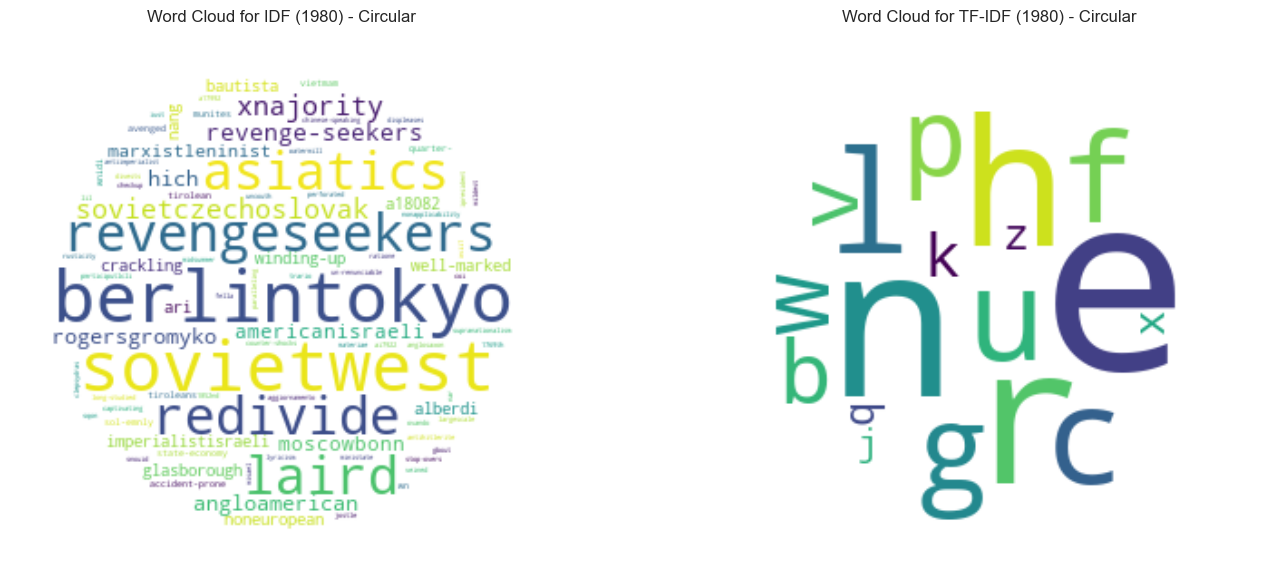

In [127]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

freq_df_1990['tfidf'] = freq_df_1990['freq'] * idf_df_1990['idf']

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

freq_df_1990['tfidf'].fillna(0, inplace=True)

wordcloud_tfidf_1990 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(freq_df_1990['tfidf'].to_dict())

wordcloud_idf_1990 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(idf_df_1990['idf'].to_dict())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf_1990, interpolation='bilinear')
plt.title('Word Cloud for IDF (1990) - Circular')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf_1990, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (1990) - Circular')
plt.axis('off')

plt.tight_layout()
plt.show()



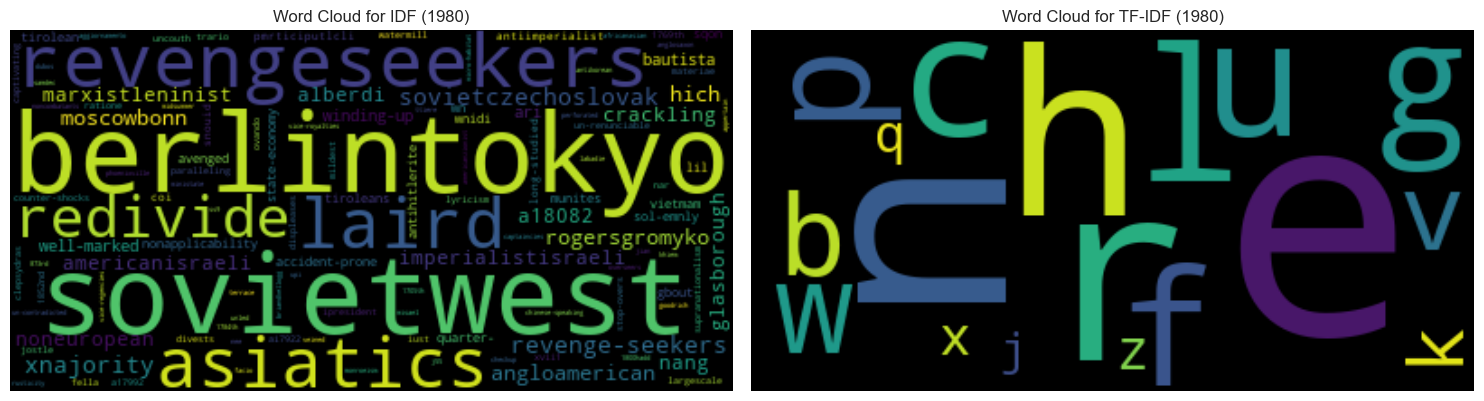

In [128]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_idf_1990 = WordCloud(background_color='black').generate_from_frequencies(idf_df_1990['idf'].to_dict())

wordcloud_tfidf_1990 = WordCloud(background_color='black').generate_from_frequencies(freq_df_1990['tfidf'].to_dict())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf_1990, interpolation='bilinear')
plt.title('Word Cloud for IDF (1990)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf_1990, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (1990)')
plt.axis('off')

plt.tight_layout()
plt.show()

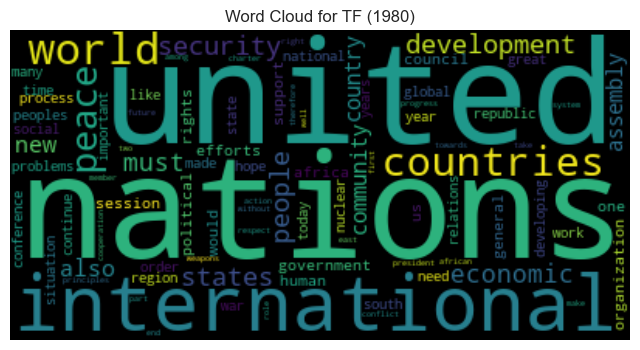

In [129]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud_tf_1990 = WordCloud(background_color='black').generate_from_frequencies(freq_df['freq'].to_dict())

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_tf_1990, interpolation='bilinear')
plt.title('Word Cloud for TF (1990)')
plt.axis('off')
plt.show()


## Comparing 2015 TF & 2015 TFIDF

## importing libraries and loading dataset 

In [130]:
import pandas as pd

file = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"

df = pd.read_csv(file)

df_2015 = df[df['year'] == 2015]

df_2015.head(20)

,session,year,country,country_name,speaker,position,text
7314,70,2015,AFG,Afghanistan,Mr. Abdullah Abdullah,Chief Executive Officer,"It gives me great pleasure, on behalf of the I..."
7315,70,2015,AGO,Angola,Mr. Manuel Domingos Vicente,vice-President,"At the outset, on behalf of the President of A..."
7316,70,2015,ALB,Albania,Mr. Edi Rama,Prime minister,"One year ago, Pope Francis began his visits ar..."
7317,70,2015,AND,Andorra,Mr. Antoni Martí Petit,Head of Government,"It is my honour to represent my country, the P..."
7318,70,2015,ARE,United Arab Emirates,Sheikh Abdullah Bin Zayed Al Nahyan,Minister for Foreign Affairs,It is my pleasure to congratulate Mr. Mogens L...
7319,70,2015,ARG,Argentina,Cristina Fernández,President,"At the outset, allow me to welcome a very rele..."
7320,70,2015,ARM,Armenia,Mr. Serzh Sargsyan,President,"I congratulate you, Mr. President, on your ele..."
7321,70,2015,ATG,Antigua and Barbuda,Mr. Gaston Alphonso Browne,Prime minister,"Democracy, peace, security, rule of law and re..."
7322,70,2015,AUS,Australia,Ms. Julie Bishop,Minister for Foreign Affairs,We meet this day at an important time for the ...
7323,70,2015,AUT,Austria,Mr. Sebastian Kurz,Minister for Foreign Affairs,"Seventy years ago, the United Nations was foun..."


## Displaying the dataframe for the year 2015

In [131]:
df_2015 = df[df['year'] == 2015]

print(df_2015.head())

      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan  Minister for Foreign Affairs   

                                                   text  
7314  It gives me great pleasure, on behalf of the I...  
7315  At the outset, on behalf of the President of A...  
7316  One year ago, Pope Francis began his visits ar... 

## Printing stopwords for the year 2015

In [132]:
import nltk
import pandas as pd

stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

file_path = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"

df_2015 = pd.read_csv(file_path)

df_2015 = df[df['year'] == 2015]

print(df_2015.head())

{'won', 's', 'now', 'for', 'as', 'only', "haven't", 'but', 'those', 'then', 'has', 'your', 'should', 'will', "mustn't", "aren't", 'and', "needn't", 'into', 'me', "you're", 'no', "you'll", 'when', 'itself', 'couldn', 'does', 'a', "wouldn't", 'whom', 'nor', 'up', 'didn', 'isn', 'themselves', 'is', 'ma', 'all', "should've", 'while', 'yours', 'at', 'very', 'what', 'which', 'in', 'm', "won't", "don't", 'other', "weren't", 'wouldn', 'here', 'they', 'just', "isn't", "shouldn't", 'any', 'ain', 'how', 'under', 'my', 'had', 'i', 'out', 'after', 'doesn', 'we', 've', 'from', 'than', 'them', 'hasn', 'below', 'hers', 'further', "didn't", 'it', 'was', 'mustn', 're', 'until', 'more', 'been', 'once', 'its', 'to', 'don', 'this', 'during', 'or', 'him', 'down', 'hadn', 'doing', 'she', 'an', "hasn't", 'who', 'shouldn', 'if', 'most', 'll', 'herself', 'theirs', 'yourselves', 'both', 'd', 'did', 'same', 'he', "you'd", 'o', 'why', 'haven', 'am', "mightn't", 'between', 'mightn', 'over', 'not', "wasn't", 'oursel

## Removing stopwords for the year 2015

In [133]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

file_path = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

df_2015 = df[df['year'] == 2015].copy()

text_column_name = 'text'

stop_words = set(stopwords.words('english'))
df_2015[text_column_name] = df_2015[text_column_name].apply(
    lambda x: ' '.join([word.lower() for word in str(x).split() if word.lower() not in stop_words])
)

print(df_2015.head(10))

      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   
7319       70  2015     ARG             Argentina   
7320       70  2015     ARM               Armenia   
7321       70  2015     ATG   Antigua and Barbuda   
7322       70  2015     AUS             Australia   
7323       70  2015     AUT               Austria   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan

## Pre-processing the pipeline 

In [134]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

text_column_name = 'text'

file_path = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

df_2015 = df[df['year'] == 2015].copy()

stop_words = set(stopwords.words('english'))

df_2015[text_column_name+'_tokens'] = df_2015[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

print(df_2015.head(10))

      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   
7319       70  2015     ARG             Argentina   
7320       70  2015     ARM               Armenia   
7321       70  2015     ATG   Antigua and Barbuda   
7322       70  2015     AUS             Australia   
7323       70  2015     AUT               Austria   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan

## Running the pipeline 

In [135]:
import regex as re
import pandas as pd
from nltk.corpus import stopwords
import nltk

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

text_column_name = 'text'

file_path = "C:/Users/dharm/Downloads/un-general-debates-blueprint.csv"
df = pd.read_csv(file_path)

df_2015 = df[df['year'] == 2015].copy()

stop_words = set(stopwords.words('english'))

df_2015[text_column_name+'_tokens'] = df_2015[text_column_name].apply(prepare, pipeline=pipeline, stop_words=stop_words)

print(df_2015.head(10))

      session  year country          country_name  \
7314       70  2015     AFG           Afghanistan   
7315       70  2015     AGO                Angola   
7316       70  2015     ALB               Albania   
7317       70  2015     AND               Andorra   
7318       70  2015     ARE  United Arab Emirates   
7319       70  2015     ARG             Argentina   
7320       70  2015     ARM               Armenia   
7321       70  2015     ATG   Antigua and Barbuda   
7322       70  2015     AUS             Australia   
7323       70  2015     AUT               Austria   

                                  speaker                      position  \
7314                Mr. Abdullah Abdullah       Chief Executive Officer   
7315          Mr. Manuel Domingos Vicente                vice-President   
7316                         Mr. Edi Rama                Prime minister   
7317               Mr. Antoni Martí Petit            Head of Government   
7318  Sheikh Abdullah Bin Zayed Al Nahyan

## Counting the tokens for the year 2015

In [136]:
from collections import Counter

counter = Counter()
df_2015['text_tokens'].map(counter.update)

freq_df_2015 = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df_2015 = freq_df_2015.query('freq >= 1')
freq_df_2015.index.name = 'token'
freq_df_2015 = freq_df_2015.sort_values('freq', ascending=False)

print(freq_df_2015.head(20))

               freq
token              
nations        2587
united         2571
development    1754
international  1727
world          1635
security       1391
peace          1281
people         1229
countries      1086
must           1033
also           1005
states          995
human           944
country         912
us              900
global          830
rights          789
new             744
sustainable     739
years           700


## TFIDF and IDF compare for the year 2015

In [138]:
import pandas as pd
import numpy as np
from collections import Counter
import regex as re
from nltk.corpus import stopwords
import nltk

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline, **kwargs):
    tokens = text
    for fun in pipeline:
        if fun == remove_stop:
            tokens = fun(tokens, kwargs.get('stop_words'))
        else:
            tokens = fun(tokens)
    return tokens

df_2015 = pd.read_csv("C:/Users/dharm/Downloads/un-general-debates-blueprint.csv")

stop_words = set(stopwords.words('english'))

df_2015['text_tokens'] = df_2015['text'].apply(prepare, pipeline=pipeline, stop_words=stop_words)

def compute_idf(df_2015, column='text_tokens', min_df_2015=1):
    def update(doc):
        counter.update(set(doc))
    counter = Counter()
    df_2015[column].map(update)
    idf_df_2015 = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df_2015 = idf_df_2015.query('df >= @min_df_2015')
    idf_df_2015['idf'] = np.log(len(df_2015)/idf_df_2015['df']) + 0.1
    idf_df_2015.index.name = 'token'
    return idf_df_2015

idf_df_2015 = compute_idf(df_2015)
print(idf_df_2015.head(20))

                 df       idf
token                        
insatiable       45  5.216929
organization   6820  0.195976
blow            288  3.360631
tactics         320  3.255270
supports       2997  1.018224
questionable     68  4.804083
oneself          78  4.666882
underhand         5  7.414153
inviolability   246  3.518260
precisely       909  2.211246
south          4593  0.591303
elimination    1999  1.423189
throwing         35  5.468243
states         7211  0.140228
lull             47  5.173444
instrument     1934  1.456246
arrogate         47  5.173444
order          6263  0.281177
partner         575  2.669221
activity       1251  1.891893


## TFIDF = TF *IDF FOR 2015

In [139]:
freq_df_2015['tfidf'] = freq_df_2015['freq'] * idf_df_2015['idf']

print(freq_df_2015.head())

               freq       tfidf
token                          
nations        2587  262.838649
united         2571  261.556104
development    1754  245.473993
international  1727  182.157981
world          1635  173.768625


## Wordcloud 

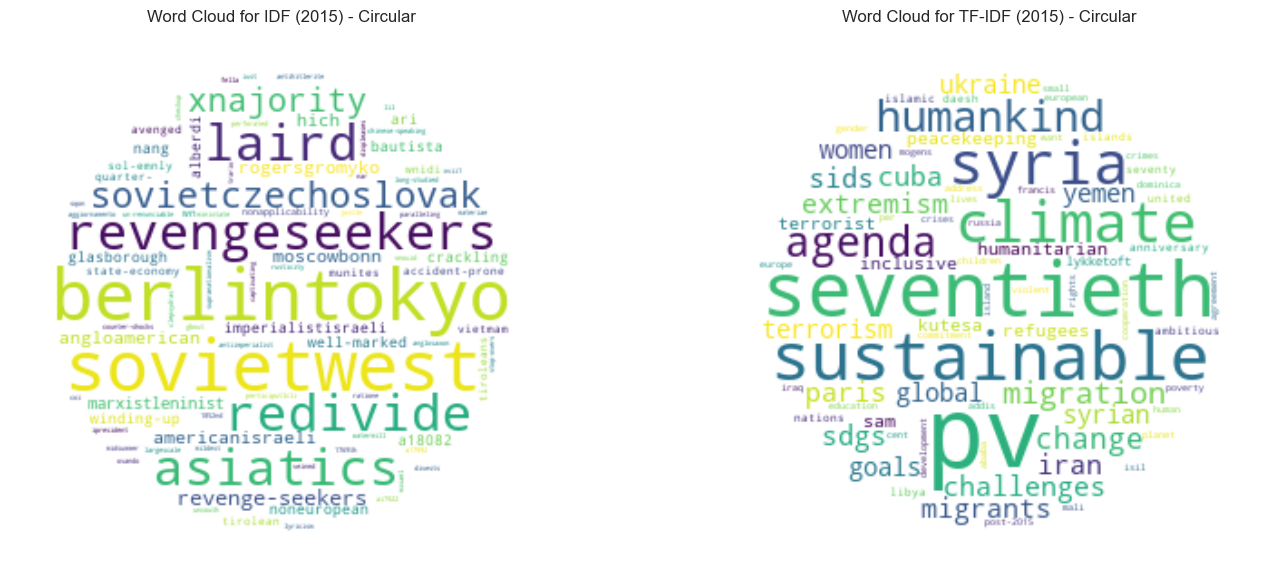

In [140]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

freq_df_2015['tfidf'] = freq_df_2015['freq'] * idf_df_2015['idf']

x, y = np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud_idf_2015 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(idf_df_2015['idf'].to_dict())

wordcloud_tfidf_2015 = WordCloud(background_color='white', mask=mask).generate_from_frequencies(freq_df_2015['tfidf'].to_dict())

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_idf_2015, interpolation='bilinear')
plt.title('Word Cloud for IDF (2015) - Circular')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_tfidf_2015, interpolation='bilinear')
plt.title('Word Cloud for TF-IDF (2015) - Circular')
plt.axis('off')

plt.tight_layout()
plt.show()


## Function to count the keywords

In [141]:
import pandas as pd
from collections import Counter
import regex as re
from nltk.corpus import stopwords

df = pd.read_csv("C:/Users/dharm/Downloads/un-general-debates-blueprint.csv")

def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', str(text))

df['tokens'] = df['text'].apply(tokenize)

df['num_tokens'] = df['tokens'].map(len)

def remove_stop(tokens, stop_words):
    return [t for t in tokens if t.lower() not in stop_words]

stop_words = set(stopwords.words('english'))

df['tokens'] = df['tokens'].apply(remove_stop, stop_words=stop_words)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

keywords_to_count = ['sample', 'sentence', 'example']

df['keyword_counts'] = df['tokens'].apply(count_keywords, keywords=keywords_to_count)

print(df.head())


   session  year country country_name             speaker position  \
0       25  1970     ALB      Albania             Mr. NAS      NaN   
1       25  1970     ARG    Argentina  Mr. DE PABLO PARDO      NaN   
2       25  1970     AUS    Australia         Mr. McMAHON      NaN   
3       25  1970     AUT      Austria  Mr. KIRCHSCHLAEGER      NaN   
4       25  1970     BEL      Belgium          Mr. HARMEL      NaN   

                                                text  \
0  33: May I first convey to our President the co...   
1  177.\t : It is a fortunate coincidence that pr...   
2  100.\t  It is a pleasure for me to extend to y...   
3  155.\t  May I begin by expressing to Ambassado...   
4  176. No doubt each of us, before coming up to ...   

                                              tokens  num_tokens  \
0  [May, first, convey, President, congratulation...        8256   
1  [fortunate, coincidence, precisely, time, Unit...        4711   
2  [pleasure, extend, Mr, President, w

## Function to group by year

In [142]:
import pandas as pd

def tokenize(text):
    return text.split() 

df = pd.read_csv("C:/Users/dharm/Downloads/un-general-debates-blueprint.csv")

df['tokens'] = df['text'].apply(tokenize)

keywords_to_count = ['country', 'speaker', 'position']

result_df = count_keywords_by(df, by='year', keywords=keywords_to_count)

print(result_df)

    year  country  speaker  position
0   1970      226        0        94
1   1971      455        2       187
2   1972      477        6       148
3   1973      474        6       135
4   1974      604        0       173
5   1975      468        1       168
6   1976      531        1       188
7   1977      604        2       206
8   1978      600        0       221
9   1979      668        1       200
10  1980      715        4       237
11  1981      598        8       177
12  1982      576        1       203
13  1983      669        2       208
14  1984      622        0       198
15  1985      527        1       137
16  1986      498        0       159
17  1987      503        5       155
18  1988      500        1       123
19  1989      562        3       126
20  1990      538        4        93
21  1991      577        1       112
22  1992      565        2        97
23  1993      587        3       100
24  1994      581        1       102
25  1995      509        1        82
2

In [176]:
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

## Heatmap

In [177]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil',
            'syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping', 
            'humanitarian', 'climate', 'soviet','russia', 'sustainable','egypt']  
freq_df = count_keywords_by(df, by='year', keywords=keywords)
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
freq_df = freq_df.apply(np.sqrt)

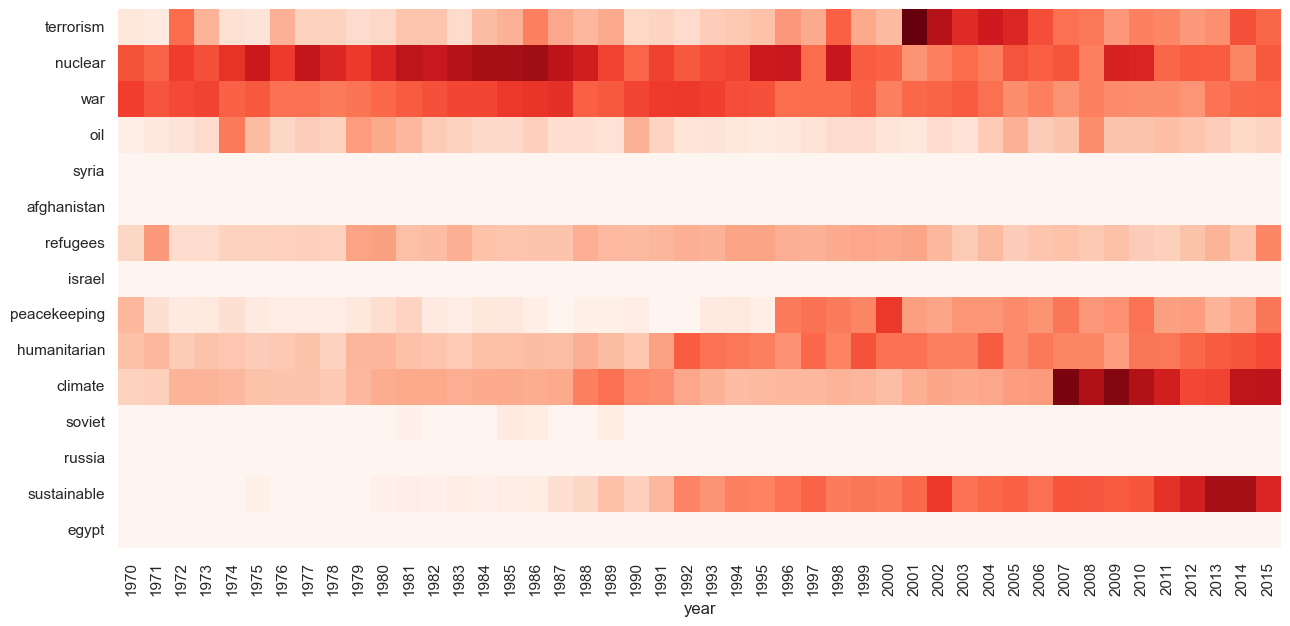

In [178]:
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)